## Question 1

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from sympy import *
import matplotlib.patches as mpatches


(-2.0, 2.0)

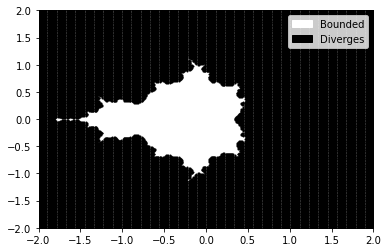

In [82]:
x, y = np.meshgrid(np.linspace(-2, 2, 300), np.linspace(-2, 2, 300))
converged = []
diverged = []
def z(c):
    """
    A python function that represents the complex number function provided
    Parameters
    ----------
    c : complex 
        A complex number that lies inside the 
    """
    out = np.zeros(10, dtype  = complex)
    z = 0 
    for i in range(10):
        out[i] = z
        z = z**2 + c
    return out
for i in range(len(x)):
    for k in range(len(y)):
        maxval =  2
        convergence = True
        number = 0
        c = x[i][k] + y[i][k]*1j
        output = z(c)
        mag = np.abs(output)
        if mag.max() > maxval:
            convergence = False
        if convergence == True:
            color = 'blue'
            converged = np.append(converged, c)
            number = number+1
        else: 
            color = 'red'
            diverged = np.append(diverged, c)
plt.scatter(converged.real, converged.imag, color = 'white', s=1)
plt.scatter(diverged.real, diverged.imag, color = 'black', s=1)
patch1 = mpatches.Patch(color='white', label='Bounded')
patch2 = mpatches.Patch(color='black', label='Diverges')
plt.legend(handles =[patch1, patch2])
plt.xlim(-2, 2)
plt.ylim(-2, 2)



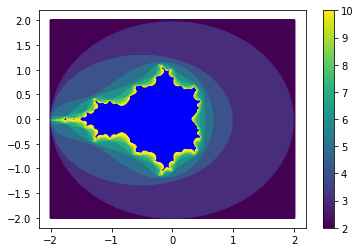

In [71]:
x, y = np.meshgrid(np.linspace(-2, 2, 500), np.linspace(-2, 2, 500))
converged = []
diverged = []
for i in range(len(x)):
    for k in range(len(y)):
        maxval =  2
        convergence = True
        divergence  = False
        iteration = 0
        c = x[i][k] + y[i][k]*1j
        output = z(c)
        #for i in range(len(output)):
        #        print(1)
        #    if divergence == False and output[i]>2:
        #        divergence = True
        #        iteration = i+1
        mag = np.abs(output)
        if mag.max() > maxval:
            convergence = False
        if convergence == True:
            color = 'blue'
            converged = np.append(converged, c)
        else: 
            color = 'red'
            diverged = np.append(diverged, c)

plt.scatter(converged.real, converged.imag, color = 'blue', s=1)
#plt.scatter(diverged.real, diverged.imag, iteration)


iteration = []
for p in range(len(diverged)):
    result = z(diverged[p])
    magnitude = np.abs(result)
    exit = False
    for q in range(len(result)):
        if exit == False and magnitude[q]> maxval:
            exit = True 
            iteration = np.append(iteration, q+1)

plt.scatter(diverged.real, diverged.imag, c = iteration, s=1)
plt.colorbar()

## Question 2

In [4]:
from scipy.integrate import solve_ivp

def lorenz(t, W, sigma, r, b):
    """
    A python function representing Lorenz's equations. 
    Parameters
    -----------
    t : float
        represents time, which is the independant variable 
    W : numpy array
        represents the Fourier modes that Lorenz decided to keep. There are three modes given by X  = W[0], Y = W[1], and Z  =W[2]
    sigma : float
            representst the Prandtl number
    r : float
        represents the Rayleigh number
    b : float
        represents the dimensionless lenght scale
    """
    return [-sigma*(W[0]-W[1]), r*W[0]-W[1] -W[0]*W[2], -b*W[2] + W[0]*W[1]]

[Text(0, 0.5, '$Y$')]

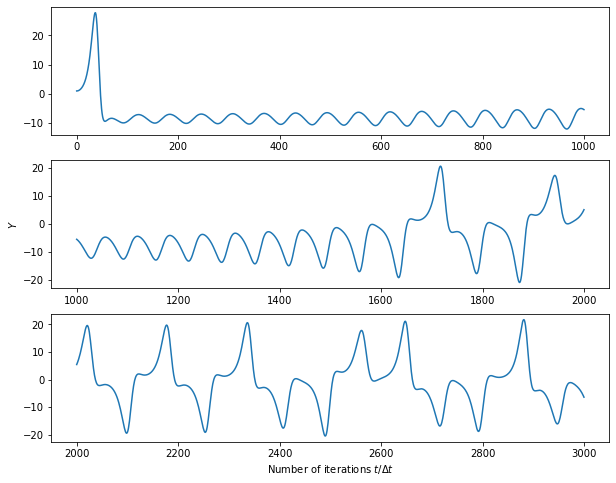

In [5]:
W0  = [0, 1, 0]
args = (10, 28, 8/3)
sigma, r,  b = args
t_span = [0, 60]
t = np.linspace(t_span[0], t_span[1], 6000)

N1  = np.linspace(0, 1000, 1000)
N2 = np.linspace(1000, 2000, 1000)
N3 = np.linspace(2000, 3000, 1000)
sol = solve_ivp(lorenz, y0 = W0, t_span = t_span, t_eval = t, args = args)
f,ax = plt.subplots(3,1,figsize=(10,8))
ax[0].plot(N1,sol.y[1][:1000])
ax[1].plot(N2,sol.y[1][1000:2000])
ax[2].plot(N3,sol.y[1][2000:3000])
plt.xlabel("Number of iterations $t/\Delta t$")
ax[1].set(ylabel = "$Y$")

[(20.0, -20.0), Text(0.5, 0, 'Y'), Text(0, 0.5, 'X')]

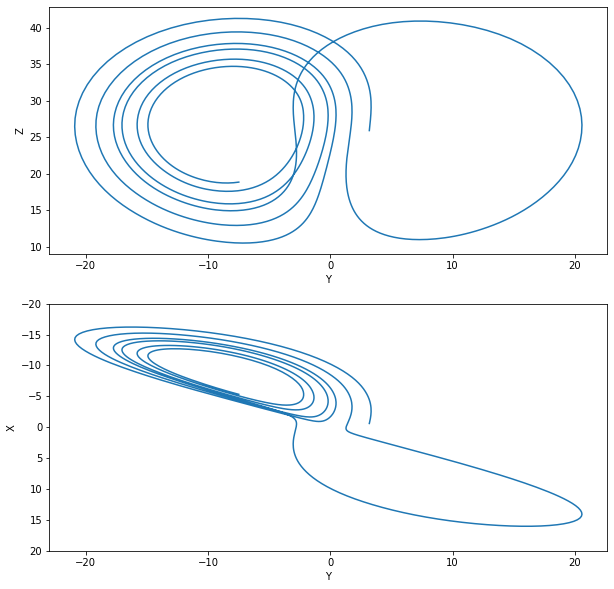

In [6]:
t2 = np.linspace(14, 19, 1000)
sol2 = solve_ivp(lorenz, y0 = W0, t_span = t_span, t_eval = t2, args = args)
f,ax = plt.subplots(2,1,figsize=(10,10))
ax[0].plot(sol2.y[1],sol2.y[2])
ax[0].set(xlabel = "Y", ylabel = "Z")
ax[1].plot(sol2.y[1], sol2.y[0])
ax[1].set( ylim =(20, -20), xlabel = "Y", ylabel ="X" )

[[0.00000000e+00 9.51379974e-02 1.82825217e-01 ... 1.44837042e+00
  1.53250496e+00 1.62683382e+00]
 [1.00000000e+00 1.00353779e+00 1.03240301e+00 ... 2.23787348e+00
  2.42212564e+00 2.62223976e+00]
 [0.00000000e+00 4.79162528e-04 1.86767271e-03 ... 1.42308015e+01
  1.38905208e+01 1.35642523e+01]]
BLAH
[[ 0.00000000e+00  9.51379983e-02  1.82825219e-01 ... -7.93701754e+00
  -7.02790810e+00 -6.16412499e+00]
 [ 1.00000001e+00  1.00353780e+00  1.03240302e+00 ...  1.34636450e+00
   1.85029151e+00  2.21891478e+00]
 [ 0.00000000e+00  4.79162537e-04  1.86767274e-03 ...  3.54753474e+01
   3.44227491e+01  3.33838852e+01]]
BLAH
[[ 0.00000000e+00 -9.51379059e-10 -1.82825483e-09 ...  9.38538796e+00
   8.56041305e+00  7.79095880e+00]
 [-9.99999994e-09 -1.00353765e-08 -1.03239808e-08 ...  8.91508985e-01
   5.71834131e-01  4.03324985e-01]
 [ 0.00000000e+00 -9.58313604e-12 -3.73537592e-11 ... -2.12445459e+01
  -2.05322284e+01 -1.98196329e+01]]


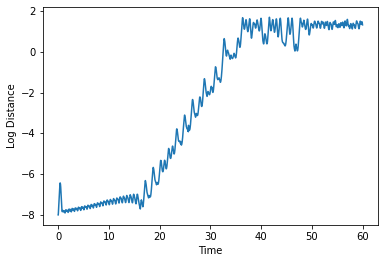

In [7]:
W1  = [0, 1+ 1e-8, 0]
args = (10, 28, 8/3)
sigma, r,  b = args
t_span = [0, 60]
t = np.linspace(t_span[0], t_span[1], 6000)

sol3 = solve_ivp(lorenz, y0 = W1, t_span = t_span, t_eval = t, args = args)
distance = np.zeros(6000)
for i in range(len(distance)):
    distance[i] = np.linalg.norm((sol.y-sol3.y).T[i])
logdistance = np.log10(distance)
fig, ax = plt.subplots()
plt.plot(t, logdistance)
plt.xlabel("Time")
plt.ylabel("Log Distance")

print(sol.y)
print("BLAH")
print(sol3.y)
print("BLAH")
print(sol.y -sol3.y)

